**Objective:** To formally test which features are statistically associated with stroke occurrence.

- **Null Hypothesis (H₀):** Feature has no effect / is independent of stroke.
- **Alternative Hypothesis (H₁):** Feature is associated with stroke occurrence.
- Significance level: α = 0.05

             Feature        Test  Statistic       p-value  Significant
0                age      T-test  18.080834  7.030778e-71         True
1  avg_glucose_level      T-test   9.513352  2.767811e-21         True
2                bmi      T-test   2.970943  2.983269e-03         True
3             gender  Chi-square   0.472587  7.895491e-01        False
4       hypertension  Chi-square  81.605368  1.661622e-19         True
5      heart_disease  Chi-square  90.259561  2.088785e-21         True
6       ever_married  Chi-square  58.923890  1.638902e-14         True
7          work_type  Chi-square  49.163512  5.397708e-10         True
8     residence_type  Chi-square   1.081637  2.983317e-01        False
9     smoking_status  Chi-square  29.147269  2.085400e-06         True


AttributeError: 'Cell' object has no attribute 'set_valign'

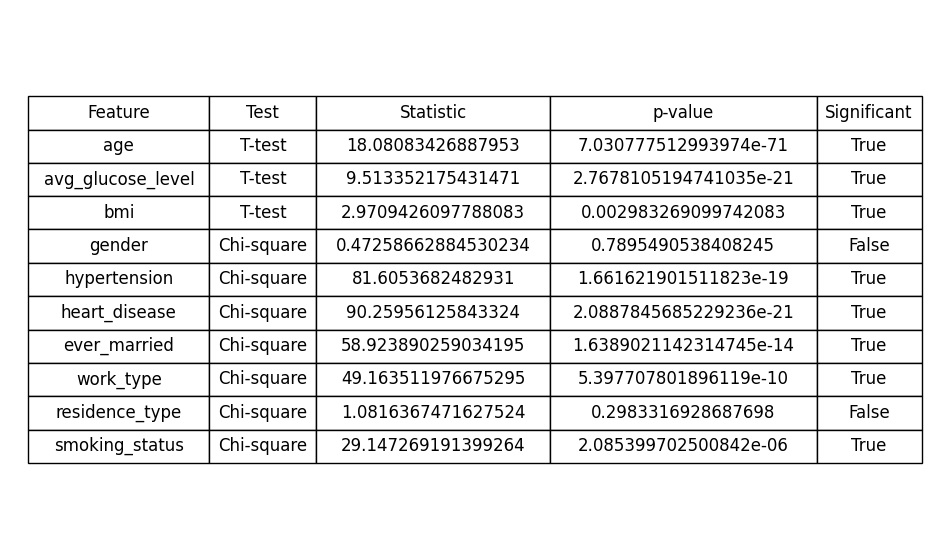

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency

#load cleaned dataset
df = pd.read_parquet('../Data/processed_stroke_data.parquet')
alpha = 0.05 # significance level

numerical_cols = ['age', 'avg_glucose_level', 'bmi']
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
results = []

# T-test for numerical features
for col in numerical_cols:
    stroke_group = df[df['stroke'] == 1][col].dropna()
    no_stroke_group = df[df['stroke'] == 0][col].dropna()
    t_stat, p_value = ttest_ind(stroke_group, no_stroke_group)
    results.append((col, 'T-test', t_stat, p_value, p_value < alpha))

# Chi-square test for categorical features
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['stroke'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    results.append((col, 'Chi-square', chi2, p_value, p_value < alpha))

# Display results
results_df = pd.DataFrame(results, columns=['Feature', 'Test', 'Statistic', 'p-value', 'Significant'])
print(results_df)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, len(results_df)*0.6 + 1))

# Hide axes
ax.axis('off')

# Create table
tbl = ax.table(
    cellText=results_df.values,
    colLabels=results_df.columns,
    cellLoc='center',
    loc='center'
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.auto_set_column_width(col=list(range(len(results_df.columns))))
tbl.scale(1, 2)

# Color rows and highlight Significant column
for (i, j), cell in tbl.get_celld().items():
    # Header row
    if i == 0:
        cell.set_facecolor('#40466e')
        cell.set_text_props(weight='bold', color='white', verticalalignment='center', horizontalalignment='center')
    else:
        # alternating row colors
        cell.set_facecolor('#f1f1f2' if i % 2 == 0 else 'white')
        cell.set_text_props(verticalalignment='center', horizontalalignment='center')
        # Significant column coloring (last column)
        if j == 4:  # 'Significant' column
            if results_df.iloc[i-1]['Significant']:
                cell.set_facecolor('green')
                cell.set_text_props(weight='bold', color='white', verticalalignment='center', horizontalalignment='center')
            else:
                cell.set_facecolor('red')
                cell.set_text_props(weight='bold', color='white', verticalalignment='center', horizontalalignment='center')

# Save figure
plt.savefig('../Images/hypothesis_test_results.png', bbox_inches='tight', dpi=300, facecolor = 'white')
plt.tight_layout()
plt.show()



**Observations for Numerical Features:**

- **Age**: p < 0.001 → Significant. Older patients have higher stroke occurrence.  
- **Avg Glucose Level**: p < 0.001 → Significant. Higher glucose levels associated with stroke.  
- **BMI**: p = 0.003 → Significant, but effect size is smaller compared to age and glucose.

**Observations for Categorical Features:**

- **Gender**: p = 0.79 → Not significant. Stroke occurrence is independent of gender.  
- **Hypertension**: p < 0.001 → Significant. Hypertension increases stroke likelihood.  
- **Heart Disease**: p < 0.001 → Significant. History of heart disease strongly associated with stroke.  
- **Ever Married**: p < 0.001 → Significant. Marital status shows association.  
- **Work Type**: p < 0.001 → Significant.  
- **Residence Type**: p = 0.30 → Not significant.  
- **Smoking Status**: p < 0.001 → Significant. Formerly smoked / currently smoking associated with stroke.